In [1]:
# For numerical calculations
import numpy as np
import pandas as pd
import scipy as sp
import math
import matplotlib.animation as animation
from scipy.integrate import odeint
from numpy import arange
from pylab import *
from scipy.integrate import odeint
import scipy.optimize 
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from math import exp
from collections import OrderedDict
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None
from scipy.signal import savgol_filter
import git

# Find home directory for repo
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir

# Import plotting features
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("ticks")
sns.set_palette("colorblind", color_codes=True)
sns.set_context("poster")

# Magic command to plot inline
%matplotlib inline

#To graph in SVG (high def)
%config InlineBackend.figure_format="svg"

## Part I: Establishing count behavior throughout run

In [ ]:
# Import excel file
df_data = pd.read_excel(f'{homedir}/data/raw/ICP-MS/SR2113_ICP_MS.xlsx')
df_data.head()

In [160]:
#Filter counts 
#Get counts
df_data['U238_counts'] = df_data['U238_CPS']*0.2
df_data['Fe56_counts'] = df_data['Fe56_CPS']*0.2
#Calculate exp. error from counting statistics
df_data['U238_exp_cs'] = 1/np.sqrt(df_data['U238_counts'])
df_data['Fe56_exp_cs'] = 1/np.sqrt(df_data['Fe56_counts'])
#Calculate relative error from counting statistics
df_data['U238_rel_cs'] = (df_data['U238_RSD']/100)/df_data['U238_exp_cs']
df_data['Fe56_rel_cs'] = (df_data['Fe56_RSD']/100)/df_data['U238_exp_cs']
df_data.head()

,Unnamed: 0,Rjct,Data File,Acq. Date-Time,Type,runno,Sample Name,Core,Depth,Dilfac,Mg24_CPS,Mg24_RSD,Det.,Ca43_CPS,Ca43_RSD,Det..1,Ca44_CPS,Ca44_RSD,Det..2,V51_CPS,V51_RSD,Det..3,Cr52_CPS,Cr52_RSD,Det..4,Mn55_CPS,Mn55_RSD,Det..5,Fe56_CPS,Fe56_RSD,Det..6,Fe57_CPS,Fe57_RSD,Det..7,Co59_CPS,Co59_RSD,Det..8,Ni60_CPS,Ni60_RSD,Det..9,Cu63_CPS,Cu63_RSD,Det..10,Zn66_CPS,Zn66_RSD,Det..11,Sr88_CPS,Sr88_RSD,Det..12,Cd111_CPS,Cd111_RSD,Det..13,In115_CPS,In115_RSD,Det..14,Ba137_CPS,Ba137_RSD,Det..15,U234_CPS,U234_RSD,Det..16,U235_CPS,U235_RSD,Det..17,U238_CPS,U238_RSD,Det..18,U238_counts,Fe56_counts,U238_exp_cs,Fe56_exp_cs,U238_rel_cs,Fe56_rel_cs
0,NaN,False,001SMPL.d,2022-05-02 12:00:50,blank,1,0,NaN,NaN,NaN,4.866382e+07,2.283881,A,39632.232,2.923595,P,678342.188,2.195433,P,842.974,7.341110,P,2408.996,7.105768,P,9708.728,2.901433,P,12319.468,3.256853,P,538.778,11.022895,P,5715.554,2.341192,P,849.658,10.052699,P,1285.502,10.734386,P,620.748,12.684588,P,19426.314,4.196598,P,124.944,48.498530,P,36.038,89.155650,P,464.544,14.979121,P,0.0,NaN,P,8.000,95.928399,P,2604.378,15.734471,P,520.8756,2463.8936,0.043816,0.020146,3.591031,0.743302
1,NaN,False,002SMPL.d,2022-05-02 12:03:14,blank,2,0,NaN,NaN,NaN,5.066807e+07,0.977567,A,41410.126,2.331906,P,708376.038,1.205504,P,502.580,10.947247,P,1962.380,6.321338,P,9996.778,2.764981,P,12002.328,4.718397,P,633.740,3.839847,P,5164.598,3.706096,P,687.724,4.497632,P,663.728,11.450048,P,443.814,13.663198,P,19789.038,2.703237,P,8.998,46.451604,P,8.010,162.992030,P,330.382,20.216452,P,0.0,NaN,P,0.000,NaN,P,156.008,26.491585,P,31.2016,2400.4656,0.179024,0.020410,1.479777,0.263562
2,NaN,False,003SMPL.d,2022-05-02 12:05:38,blank,3,0,NaN,NaN,NaN,5.106708e+07,1.572423,A,41831.986,1.803461,P,717586.522,1.133518,P,448.520,29.671032,P,1832.180,8.709726,P,9895.796,3.078388,P,12008.244,0.979947,P,578.762,14.313222,P,5318.588,3.391652,P,630.738,11.281671,P,617.748,14.559076,P,440.816,16.574503,P,19881.344,1.653166,P,1.000,223.606798,P,2.002,223.606798,P,340.392,18.010122,P,0.0,NaN,P,0.666,223.606798,P,30.668,38.736234,P,6.1336,2401.6488,0.403778,0.020405,0.959346,0.024269
3,NaN,False,004SMPL.d,2022-05-02 12:08:04,Standard,4,6,NaN,NaN,NaN,5.207750e+07,1.050387,A,41643.294,1.176338,P,725854.994,0.703743,P,1413.664,7.667638,P,2641.232,10.727255,P,10717.008,1.632401,P,10915.986,1.420488,P,605.756,8.402521,P,6657.530,3.514160,P,1057.576,9.780457,P,2106.232,4.585352,P,859.656,5.068514,P,20168.090,2.557270,P,252.894,12.388756,P,132316.640,1.488060,P,644.756,12.007384,P,0.0,NaN,P,19.332,30.833843,P,5399.306,3.184018,P,1079.8612,2183.1972,0.030431,0.021402,1.046308,0.466790
4,NaN,False,005SMPL.d,2022-05-02 12:10:28,Standard,5,5,NaN,NaN,NaN,5.220178e+07,0.977839,A,42275.834,3.771156,P,725397.356,0.208314,P,2160.616,6.775326,P,3940.952,3.822697,P,11328.092,3.183022,P,13438.796,2.184225,P,690.720,4.169336,P,8483.602,2.975187,P,1509.418,9.514372,P,3101.982,3.783822,P,1046.578,5.356025,P,21362.938,2.415814,P,594.756,3.710918,P,131152.134,1.405930,P,921.082,11.138203,P,0.0,NaN,P,27.336,62.421263,P,10636.512,1.663582,P,2127.3024,2687.7592,0.021681,0.019289,0.767289,1.007423


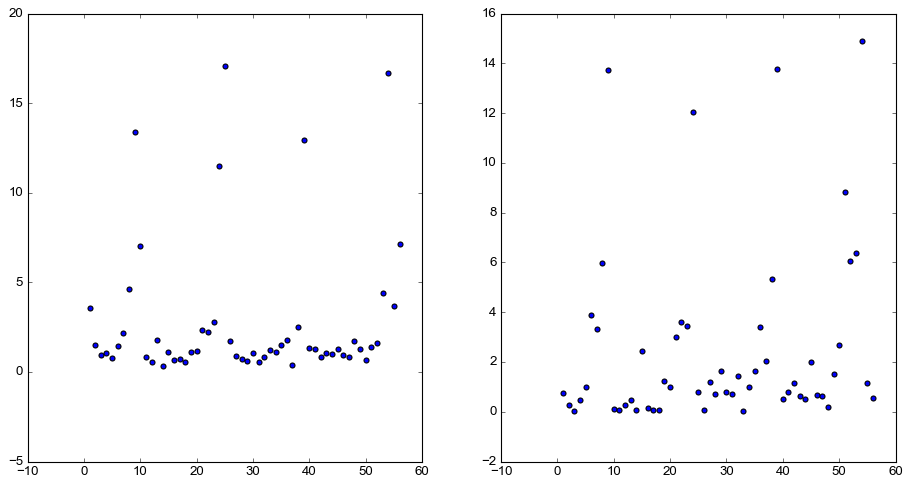

In [161]:
fig = plt.figure(figsize = (14,7), facecolor='white')
ax1 = fig.add_subplot(121)
ax1.scatter(df_data['runno'], df_data['U238_rel_cs'], label='Measured')
ax2 = fig.add_subplot(122)
ax2.scatter(df_data['runno'], df_data['Fe56_rel_cs'], label='Measured')
#ax1.set_yscale([0,5])
#ax1.set_xscale('log')
#ax1.set_ylabel('1-sigma rsd of cps')
#ax1.set_xlabel('Measured U cps')

Text(0.5, 0, 'Measured U cps')

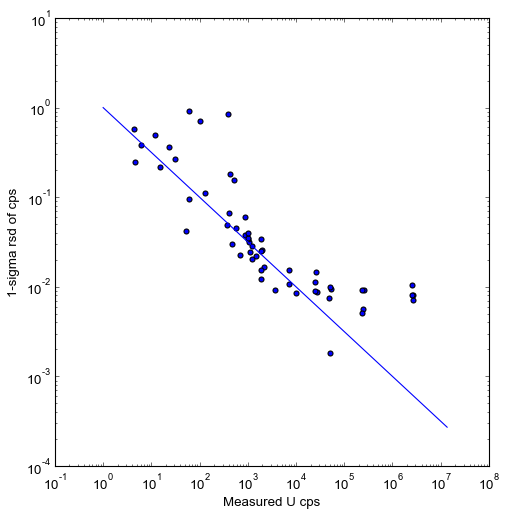

In [162]:
fig = plt.figure(figsize = (7,7), facecolor='white')
ax1 = fig.add_subplot(111)
ax1.scatter(df_data['U238_CPS']*0.2, df_data['U238_RSD']/100, label='Measured')
ax1.plot(np.linspace(1,df_data['U238_CPS'].max(),500), 1/np.sqrt(np.linspace(1,df_data['U238_CPS'].max(),500)), 
         label='Counting Stats')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel('1-sigma rsd of cps')
ax1.set_xlabel('Measured U cps')

Text(0.5, 0, 'CPS U')

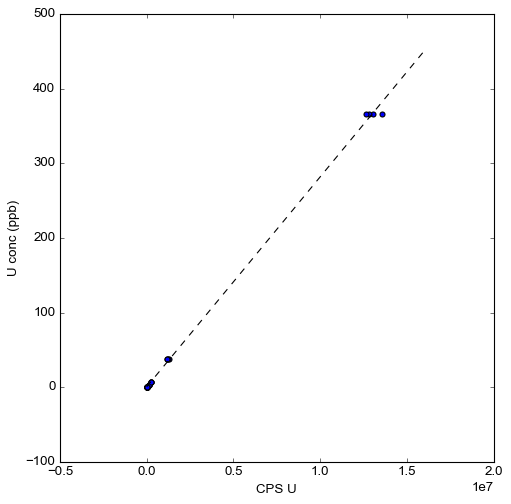

In [58]:
#Make plot for CPS vs concentration for U238
fig = plt.figure(figsize = (7,7), facecolor='white')
ax1 = fig.add_subplot(111)
ax1.scatter(df_u238_cps['Number'], df_u238_cps['Real_conc_ppb'], label='Measured')
ax1.plot(x,y,'k--')
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_ylabel('U conc (ppb)')
ax1.set_xlabel('CPS U')

Text(0.5, 0, 'Measured Mn cps')

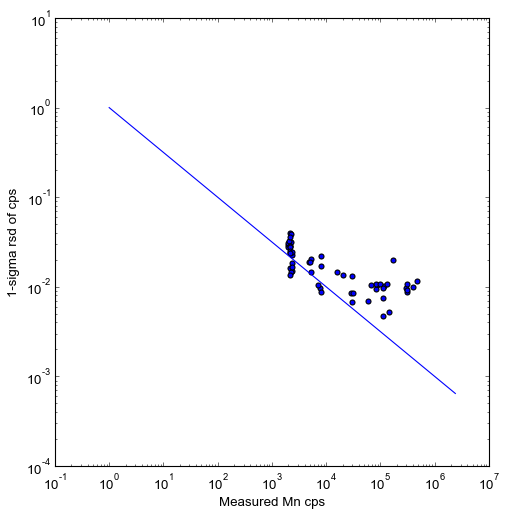

In [61]:
#Plot CPS vs 1-sigma RSD of CPS for Mn
fig = plt.figure(figsize = (7,7), facecolor='white')
ax1 = fig.add_subplot(111)
ax1.scatter(df_data['Mn55_CPS']*0.2, df_data['Mn55_RSD']/100, label='Measured')
ax1.plot(np.linspace(1,df_data['Mn55_CPS'].max(),500), 1/np.sqrt(np.linspace(1,df_data['Mn55_CPS'].max(),500)), 
         label='Counting Stats')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel('1-sigma rsd of cps')
ax1.set_xlabel('Measured Mn cps')

Text(0.5, 0, 'Measured Fe cps')

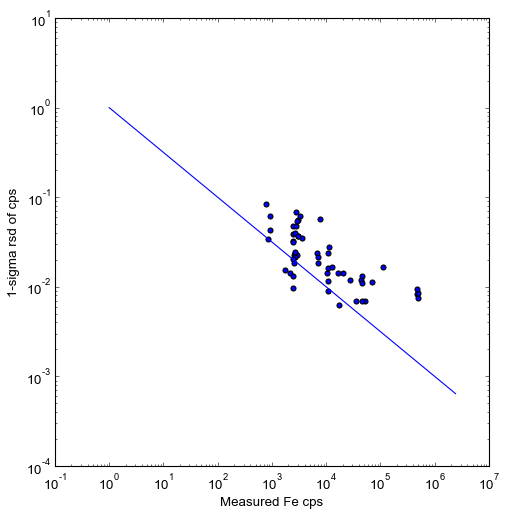

In [62]:
#Plot CPS vs 1-sigma RSD of CPS for 56Fe
fig = plt.figure(figsize = (7,7), facecolor='white')
ax1 = fig.add_subplot(111)
ax1.scatter(df_data['Fe56_CPS']*0.2, df_data['Fe56_RSD']/100, label='Measured')
ax1.plot(np.linspace(1,df_data['Fe56_CPS'].max(),500), 1/np.sqrt(np.linspace(1,df_data['Fe56_CPS'].max(),500)), 
         label='Counting Stats')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel('1-sigma rsd of cps')
ax1.set_xlabel('Measured Fe cps')

Text(0.5, 0, 'Measured Fe cps')

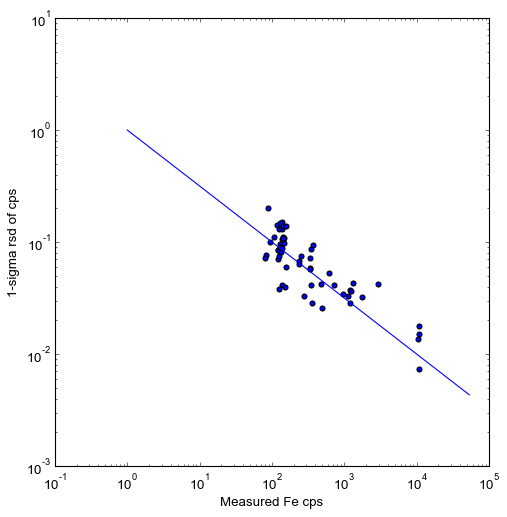

In [63]:
#Plot CPS vs 1-sigma RSD of CPS for 57Fe
fig = plt.figure(figsize = (7,7), facecolor='white')
ax1 = fig.add_subplot(111)
ax1.scatter(df_data['Fe57_CPS']*0.2, df_data['Fe57_RSD']/100, label='Measured')
ax1.plot(np.linspace(1,df_data['Fe57_CPS'].max(),500), 1/np.sqrt(np.linspace(1,df_data['Fe57_CPS'].max(),500)), 
         label='Counting Stats')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel('1-sigma rsd of cps')
ax1.set_xlabel('Measured Fe cps')

## Making plots of concentration vs. depth

In [3]:
# Import csv file
df_csv = pd.read_csv(f'{homedir}/data/raw/ICP-MS/SR2113_ICP_MS.csv')
#Filter by standard CPS only
df_standards = df_csv[(df_csv.Type == 'Standard') & (df_csv.Sample_Name != 1) & (df_csv.Measurement == 'CPS')]
df_standards.head()

,Date,Type,runno,Sample_Name,Number,Det.,Ion,Measurement,Core,Depth_cm,Real_depth_cm,Real_conc_ppb,Dilfac,Standard_group,U_spike_mass,Sample_mass,Total_mass,Conc_spike,U238_to_U236_mean,U238_to_U236_stdev,U238_to_U236_sterr,U238_to_U236_stderr,U238_to_U236_stderr_over_mean
3,5022022,Standard,4,6,52077501.42,A,Mg24,CPS,NaN,NaN,NaN,0.40,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5022022,Standard,5,5,52201778.44,A,Mg24,CPS,NaN,NaN,NaN,0.77,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5022022,Standard,6,4,51764587.26,A,Mg24,CPS,NaN,NaN,NaN,3.77,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5022022,Standard,7,3,52923862.25,A,Mg24,CPS,NaN,NaN,NaN,7.80,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5022022,Standard,8,2,51912417.84,A,Mg24,CPS,NaN,NaN,NaN,38.18,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Filter by CPS of blanks only
df_blanks = df_csv[(df_csv.Type == 'blank') & (df_csv.Measurement == 'CPS')]
df_blanks.head()

,Date,Type,runno,Sample_Name,Number,Det.,Ion,Measurement,Core,Depth_cm,Real_depth_cm,Real_conc_ppb,Dilfac,Standard_group,U_spike_mass,Sample_mass,Total_mass,Conc_spike,U238_to_U236_mean,U238_to_U236_stdev,U238_to_U236_sterr,U238_to_U236_stderr,U238_to_U236_stderr_over_mean
0,5022022,blank,1,0,48663820.61,A,Mg24,CPS,NaN,NaN,NaN,0.0,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5022022,blank,2,0,50668069.78,A,Mg24,CPS,NaN,NaN,NaN,0.0,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5022022,blank,3,0,51067083.78,A,Mg24,CPS,NaN,NaN,NaN,0.0,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5022022,blank,10,0,53289817.69,A,Mg24,CPS,NaN,NaN,NaN,0.0,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,5022022,blank,11,0,53838913.52,A,Mg24,CPS,NaN,NaN,NaN,0.0,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Get the average of the CPS of the blanks for each date
# Define column names
names = ['Date', 'Ion', 'avg_CPS_blanks']

# Group by date and ion
df_blankdate = df_blanks.groupby (['Date', 'Ion'])

# Initialize empty dataframe to save blank CPS
df_blank_cps = pd.DataFrame(columns=names)

#Loop through date groups                       
for group, data in enumerate (df_blankdate):
    #Get the average CPS
    avg_cps= data[1].Number.mean()
    # Store group and cps as list
    cps = (data[1].Date.unique(), data[1].Ion.unique(), avg_cps)
 
    # Convert list to pandas Series
    series = pd.Series(cps, index=names)   
    # Append parameters to dataframe
    df_blank_cps = df_blank_cps.append(series, ignore_index=True)
#Round the values of the dataframe to two decimal places
df_blank_cps = df_blank_cps.round(2)     
df_blank_cps

,Date,Ion,avg_CPS_blanks
0,[5022022],[Ba137],391.88
1,[5022022],[Ca43],41190.95
2,[5022022],[Ca44],730695.90
3,[5022022],[Cd111],43.77
4,[5022022],[Co59],5706.85
5,[5022022],[Cr52],1924.49
6,[5022022],[Cu63],832.24
7,[5022022],[Fe56],13339.76
8,[5022022],[Fe57],664.66
9,[5022022],[In115],20.16


In [6]:
# Subtract blank CPS from the CPS of the standards based on date

# Initialize lists to save values
date_cps = []
CPS_blank_corr = []

#loop through rows in standards dataframe
for index, row in df_standards.iterrows():
    # Extract date
    date = row.Date
    #Extract Ion
    ion = row.Ion
    # Extract cps
    cps = df_blank_cps[(df_blank_cps.Date == date) & (df_blank_cps.Ion == ion)].avg_CPS_blanks.iloc[0]
    date_cps.append(cps)
    # Compute corrected CPS
    CPS_blank_corr.append(row.Number-cps)
    
# Append values to standard dataframe
df_standards['CPS_blank_corr'] = CPS_blank_corr

df_standards.head()

,Date,Type,runno,Sample_Name,Number,Det.,Ion,Measurement,Core,Depth_cm,Real_depth_cm,Real_conc_ppb,Dilfac,Standard_group,U_spike_mass,Sample_mass,Total_mass,Conc_spike,U238_to_U236_mean,U238_to_U236_stdev,U238_to_U236_sterr,U238_to_U236_stderr,U238_to_U236_stderr_over_mean,CPS_blank_corr
3,5022022,Standard,4,6,52077501.42,A,Mg24,CPS,NaN,NaN,NaN,0.40,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,414189.29
4,5022022,Standard,5,5,52201778.44,A,Mg24,CPS,NaN,NaN,NaN,0.77,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538466.31
5,5022022,Standard,6,4,51764587.26,A,Mg24,CPS,NaN,NaN,NaN,3.77,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101275.13
6,5022022,Standard,7,3,52923862.25,A,Mg24,CPS,NaN,NaN,NaN,7.80,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1260550.12
7,5022022,Standard,8,2,51912417.84,A,Mg24,CPS,NaN,NaN,NaN,38.18,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249105.71


In [7]:
# Get the slope and intercept for the standards of each date
# Define column names
names = ['Date', 'Ion','R squared', 'Intercept', 'Slope']

#Filter by non U238
df_std_nonu238 = df_standards[(df_standards.Ion != 'U238')]

# Group by date and Ion
df_stdgroup = df_std_nonu238.groupby (['Date', 'Ion'])

# Initialize empty dataframe to save fit results
df_linreg_stds = pd.DataFrame(columns=names)
                 
# Create variables for linear regression
#Loop through standard groups                       
for group, data in enumerate (df_stdgroup):
    #x will be the CPS corrected by blank
    x_std = data[1].CPS_blank_corr.values.reshape((-1,1))
    #y will be the true values of concentration in ppb of each standard
    y_std = data[1].Real_conc_ppb
    # Create model
    model = LinearRegression().fit(x_std,y_std)
    #Determine R square, intercept and slope
    r_sq_stds = model.score(x_std,y_std)
    intercept_stds = model.intercept_
    s1 = model.coef_
    slope_stds = s1[0]
    # Store parameters and group as list
    params = (data[1].Date.unique(), data[1].Ion.unique(), r_sq_stds, intercept_stds, slope_stds)
    # Convert list to pandas Series
    series = pd.Series(params, index=names)   
    # Append parameters to dataframe
    df_linreg_stds = df_linreg_stds.append(series, ignore_index=True)
#Round the values of the dataframe to two decimal places
df_linreg_stds = df_linreg_stds.round(6)     
df_linreg_stds

,Date,Ion,R squared,Intercept,Slope
0,[5022022],[Ba137],0.999780,0.300367,0.000532
1,[5022022],[Ca43],0.042287,59.211770,0.035444
2,[5022022],[Ca44],0.112141,84.482607,-0.003300
3,[5022022],[Cd111],0.999958,0.343177,0.000537
4,[5022022],[Co59],0.999618,1.168719,0.000079
5,[5022022],[Cr52],0.999551,1.099198,0.000127
6,[5022022],[Cu63],0.999741,1.006648,0.000112
7,[5022022],[Fe56],0.999535,1.670116,0.000153
8,[5022022],[Fe57],0.999855,0.478158,0.006960
9,[5022022],[In115],0.349471,1545.592521,-0.010871


In [8]:
# Add the values for U238 to consider only the standards below 15 ppb
# Get the slope and intercept for the standards of each date

#Filter by U238 and concentration below 15 ppb
df_std_u238 = df_standards[(df_standards.Ion == 'U238') & (df_standards.Real_conc_ppb <15)]

# Group by date and Ion
df_stdgroup_u238 = df_std_u238.groupby (['Date'])

# Initialize empty dataframe to save fit results
df_linreg_stds_u238 = pd.DataFrame(columns=names)
                 
# Create variables for linear regression
#Loop through standard groups                       
for group, data in enumerate (df_stdgroup_u238):
    #x will be the CPS corrected by blank
    x_std = data[1].CPS_blank_corr.values.reshape((-1,1))
    #y will be the true values of concentration in ppb of each standard
    y_std = data[1].Real_conc_ppb
    # Create model
    model = LinearRegression().fit(x_std,y_std)
    #Determine R square, intercept and slope
    r_sq_stds = model.score(x_std,y_std)
    intercept_stds = model.intercept_
    s1 = model.coef_
    slope_stds = s1[0]
    # Store parameters and group as list
    params = (data[1].Date.unique(), data[1].Ion.unique(), r_sq_stds, intercept_stds, slope_stds)
    # Convert list to pandas Series
    series = pd.Series(params, index=names)   
    # Append parameters to dataframe
    df_linreg_stds_u238 = df_linreg_stds_u238.append(series, ignore_index=True)
#Round the values of the dataframe to two decimal places
df_linreg_stds_u238 = df_linreg_stds_u238.round(6)     
df_linreg_stds_u238

,Date,Ion,R squared,Intercept,Slope
0,[5022022],[U238],0.994070,0.329680,0.000029
1,[5142022],[U238],0.999950,-0.000590,0.000033
2,[5202022],[U238],0.999922,-0.047390,0.000059
3,[6042022],[U238],0.999915,-0.053134,0.000029


In [9]:
#Concatenate the U238 and other ion standard lin regression dataframes
df_linreg_stds = pd.concat([df_linreg_stds, df_linreg_stds_u238])
df_linreg_stds

,Date,Ion,R squared,Intercept,Slope
0,[5022022],[Ba137],0.999780,0.300367,0.000532
1,[5022022],[Ca43],0.042287,59.211770,0.035444
2,[5022022],[Ca44],0.112141,84.482607,-0.003300
3,[5022022],[Cd111],0.999958,0.343177,0.000537
4,[5022022],[Co59],0.999618,1.168719,0.000079
5,[5022022],[Cr52],0.999551,1.099198,0.000127
6,[5022022],[Cu63],0.999741,1.006648,0.000112
7,[5022022],[Fe56],0.999535,1.670116,0.000153
8,[5022022],[Fe57],0.999855,0.478158,0.006960
9,[5022022],[In115],0.349471,1545.592521,-0.010871


In [10]:
#Determine the concentrations based on the standard curve for each date

# Initialize lists to save values
slopes = []
intercepts = []
Sample_conc_ppb = []
Sample_conc_ppb_undil = []

#Filter dataframe by CPS
df_cps = df_csv[(df_csv.Measurement=='CPS')]

#Loop through rows in dataframe
for index, row in df_cps.iterrows():
    # Extract date
    date = row.Date
    #Extract ion
    ion= row.Ion
    # Extract slope and intercept
    slope = df_linreg_stds[(df_linreg_stds.Date == date) & (df_linreg_stds.Ion == ion)].Slope.iloc[0]
    intercept = df_linreg_stds[(df_linreg_stds.Date == date) & (df_linreg_stds.Ion == ion)].Intercept.iloc[0]
    slopes.append(slope)
    intercepts.append(intercept)
    # Compute corrected concentration
    Sample_conc_ppb.append((intercept + slope * row.Number)*row.Dilfac)
    Sample_conc_ppb_undil.append((intercept + slope * row.Number))
    
# Append values to dataframe
df_cps['Sample_conc_ppb'] = Sample_conc_ppb
df_cps['Sample_conc_ppb_undil'] = Sample_conc_ppb_undil
#Filter by sample
df_samples = df_cps[(df_cps.Type=='Sample')]

df_samples.head()

,Date,Type,runno,Sample_Name,Number,Det.,Ion,Measurement,Core,Depth_cm,Real_depth_cm,Real_conc_ppb,Dilfac,Standard_group,U_spike_mass,Sample_mass,Total_mass,Conc_spike,U238_to_U236_mean,U238_to_U236_stdev,U238_to_U236_sterr,U238_to_U236_stderr,U238_to_U236_stderr_over_mean,Sample_conc_ppb,Sample_conc_ppb_undil
11,5022022,Sample,12,GC35,57901403.11,A,Mg24,CPS,GC02,60.0,63.6,NaN,10.087532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-33746.588175,-3345.376174
12,5022022,Sample,13,GC16,55615803.84,A,Mg24,CPS,MC01,36.0,36.0,NaN,10.113176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-32468.611747,-3210.525818
13,5022022,Sample,14,GC52,37696077.75,A,Mg24,CPS,GC02,99.0,102.5,NaN,10.331500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22246.426559,-2153.261978
14,5022022,Sample,15,GC45,59205999.16,A,Mg24,CPS,GC02,18.0,21.5,NaN,10.089760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34530.662490,-3422.347341
15,5022022,Sample,16,GC10,58376047.99,A,Mg24,CPS,MC01,15.0,15.0,NaN,10.110436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34106.344404,-3373.380222


In [18]:
#Apply U spike correction 
# Initialize lists to save values
Sample_conc_ppb_corr = []
Spike_corr_error=[]
# Filter by ion
df_u238 = df_samples[(df_samples.Ion=='U238')]

#Loop through rows in dataframe
for index, row in df_u238.iterrows():
    #Extract date
    date=row.Date
    #Apply U spike correction for the samples spiked with U238
    if date==5202022:
        new_conc=((row.Sample_conc_ppb_undil*row.Total_mass)-(row.Conc_spike*row.U_spike_mass))/row.Sample_mass
        Sample_conc_ppb_corr.append(new_conc)
        Spike_corr_error.append(0)
    #Apply U spike correction for the samples spiked with U233/U236 - 2.0372 is the concentration of the 236U in ng/g
    elif date==6042022:
        new_conc = row.U238_to_U236_mean*row.U_spike_mass* 2.0372/row.Sample_mass
        Sample_conc_ppb_corr.append(new_conc)       
        spike_error = new_conc * np.sqrt(((2*row.U238_to_U236_stdev/row.U238_to_U236_mean)**2)+\
          ((2*0/row.U_spike_mass)**2))
        Spike_corr_error.append(spike_error) 
    else:
        Sample_conc_ppb_corr.append(row.Sample_conc_ppb)
        Spike_corr_error.append(0)
# Append values to dataframe
df_u238['Sample_conc_ppb_corr'] = Sample_conc_ppb_corr
df_u238['Spike_corr_error'] = Spike_corr_error
df_u238.head()

TypeError: can't multiply sequence by non-int of type 'float'

AttributeError: 'DataFrame' object has no attribute 'Sample_conc_ppb_corr'

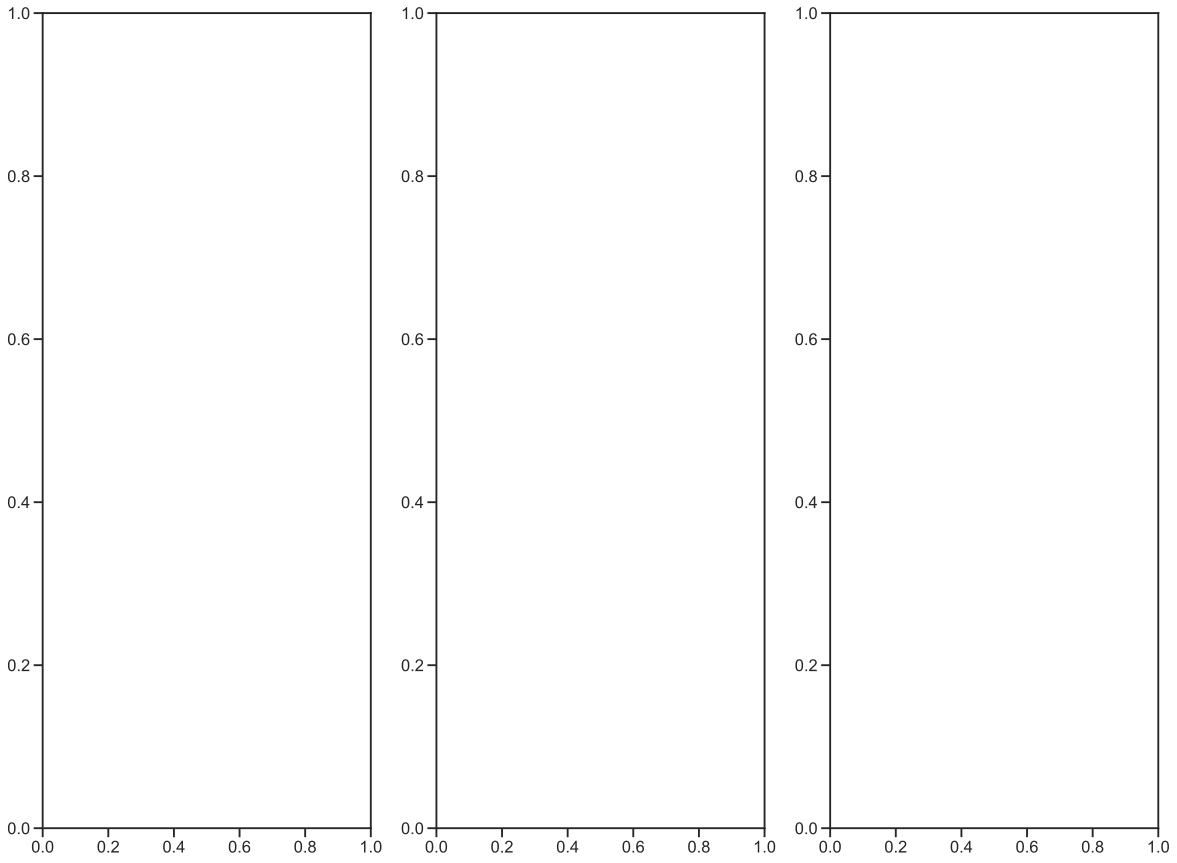

In [17]:
#Depth profile of U238

# Filter by ion and gravity cores only
df_u238_gc = df_u238[(df_u238.Core!='MC01')]# df_samples.Date!=6042022)]
# Remove outliers
df_u238_gc = df_u238_gc[(df_u238_gc.Core=='GC02') & (df_u238_gc.Depth_cm!=60)|
                 (df_u238_gc.Core=='GC04') | 
                  (df_u238_gc.Core=='GC06')] #& (df_u238_gc.Date!=5202022)]
#& (df_u238_gc.Depth_cm!=100) & (df_u238_gc.Depth_cm!=160)
#Group by core
df_group = df_u238_gc.groupby("Core")
# Initialize figure
fig, ax = plt.subplots(1, 3, figsize=(20, 15))

# Loop through cores
for i, (group, data) in enumerate(df_group):
    # Plot data
    ax[i].scatter(data.Sample_conc_ppb_corr, data.Depth_cm, s=80)
    ax[i].set_title(group)
    ax[i].set_xlabel('Concentration (ppb)')
    ax[0].set_ylabel('Depth (cm)')
   
    ax[i].set_yticks(np.linspace(205, 0, 15).round(0))
    ax[i].set_xticks(np.linspace(0, 20,5).round(0))
    #Make all plots start at depth 0 and end at depth 205
    ax[i].set_ylim(bottom=0)
    ax[i].set_ylim(top=205)
    ax[i].set_xlim(-0.5)
    #Invert y axis
    ax[i].invert_yaxis()
# Increase spacing among subplots
plt.subplots_adjust(wspace=0.3)
#Save figure
fig.savefig('U238_without_spike_corr.pdf', bbox_inches='tight')

In [ ]:
#Apply 233/236 spike correction to U238
#Filter by date
df_u238_gc_6042022 = df_u238_gc[(df_u238_gc.Date==6042022) & (df_u238_gc.Measurement=='CPS')]
df_u238_gc_6042022.head()

In [ ]:
df_u238_gc_6042022['Sample_conc_ppb_corr'] = (df_u238_gc_6042022['238_to_236_mean']-df_u238_gc_6042022['U_spike_mass'])\
/df_u238_gc_6042022['Sample_mass']
df_u238_gc_6042022['Spike_corr_error'] = df_u238_gc_6042022['Sample_conc_ppb_corr']\
* np.sqrt(((2*df_u238_gc_6042022['238_to_236_stdev']/df_u238_gc_6042022['238_to_236_mean'])**2)+\
          ((2*0/df_u238_gc_6042022['U_spike_mass'])**2))
df_u238_gc_6042022.head()

In [ ]:
df_samples

In [16]:
#Depth profile of Fe56

# Filter by ion
df_fe56 = df_samples[(df_samples.Ion=='Fe56') & (df_samples.Core!='MC01')]# & (df_samples.Date!=5202022)]
# Remove outliers
df_fe56 = df_fe56[(df_fe56.Core=='GC02') & (df_fe56.Depth_cm!=33) & (df_fe56.Depth_cm!=90) & (df_fe56.Depth_cm!=105)|
                 (df_fe56.Core=='GC04') & (df_fe56.Depth_cm!=100) & (df_fe56.Depth_cm!=160)| 
                  (df_fe56.Core=='GC06') & (df_fe56.Depth_cm!=135) & (df_fe56.Depth_cm!=165)]
df_fe56['Sample_conc_uM'] = df_fe56['Sample_conc_ppb']/55.84
df_fe56 = df_fe56.sort_values('Real_depth_cm')

# Export data table
df_fe56.to_csv(f'{homedir}/data/processed/ICP-MS/SR2113_ICP_MS_gc_fe.csv')
df_fe56.head()

,Date,Type,runno,Sample_Name,Number,Det.,Ion,Measurement,Core,Depth_cm,Real_depth_cm,Real_conc_ppb,Dilfac,Standard_group,U_spike_mass,Sample_mass,Total_mass,Conc_spike,U238_to_U236_mean,U238_to_U236_stdev,U238_to_U236_sterr,U238_to_U236_stderr,U238_to_U236_stderr_over_mean,Sample_conc_ppb,Sample_conc_ppb_undil,Sample_conc_uM
698,5022022,Sample,32,GC42,4594.666000,NaN,Fe56,CPS,GC02,3.0,6.5,NaN,10.094171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.954476,2.373100,0.428984
2641,5202022,Sample,30,a,6964.062708,NaN,Fe56,CPS,GC04,5.0,11.0,NaN,16.020453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.647934,2.037891,0.584669
2111,5142022,Sample,35,109,16593.985470,NaN,Fe56,CPS,GC06,5.0,11.0,NaN,10.130200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.713130,3.426697,0.621653
3090,6042022,Sample,46,103,30933.938920,NaN,Fe56,CPS,GC06,10.0,16.0,NaN,10.495840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.543326,5.387213,1.012595
2633,5202022,Sample,22,b,20004.744030,NaN,Fe56,CPS,GC04,10.0,16.0,NaN,10.671842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.951858,6.367397,1.216903


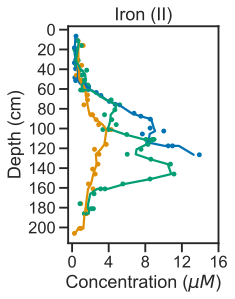

In [13]:
#Make plot for Fe56 including all cores
#Group by core
df_group = df_fe56.groupby("Core")

fig, ax = plt.subplots(figsize=(2.7,4))
for name, group in df_group:
    ax.scatter(group.Sample_conc_uM, group.Real_depth_cm, s=12, label=name)
    #ax.plot(group.Sample_conc_uM, group.Depth_cm)
    
    xhat = savgol_filter(group.Sample_conc_uM, 9, 4, mode='nearest') # window size 9, polynomial order 3
    
    #Plot the Savitzky-Golay curve for each core on top of the scatter plots
    ax.plot(xhat, group.Real_depth_cm)
    
    # Set plot title
    ax.set_title('Iron (II)'), #fontsize =16)

    #Invert y axis
    ax.invert_yaxis()
    ax.set_xlabel('Concentration ($\mu M$)')
    ax.set_ylabel('Depth (cm)')
    ax.set_yticks(np.arange(0, 220, 20.0))
    ax.set_xticks(np.linspace(0, 16, 5).round(0)) 
    #ax.set_xticks(np.linspace((ax.get_xbound()[0]), (ax.get_xbound()[1]), 5).round(1))
#ax.legend(bbox_to_anchor=(0.5, -0.25), ncol=4, loc = 'lower center')

#Save figure
fig.savefig(f'{homedir}/figures/iron_profile_poster.pdf', bbox_inches='tight')

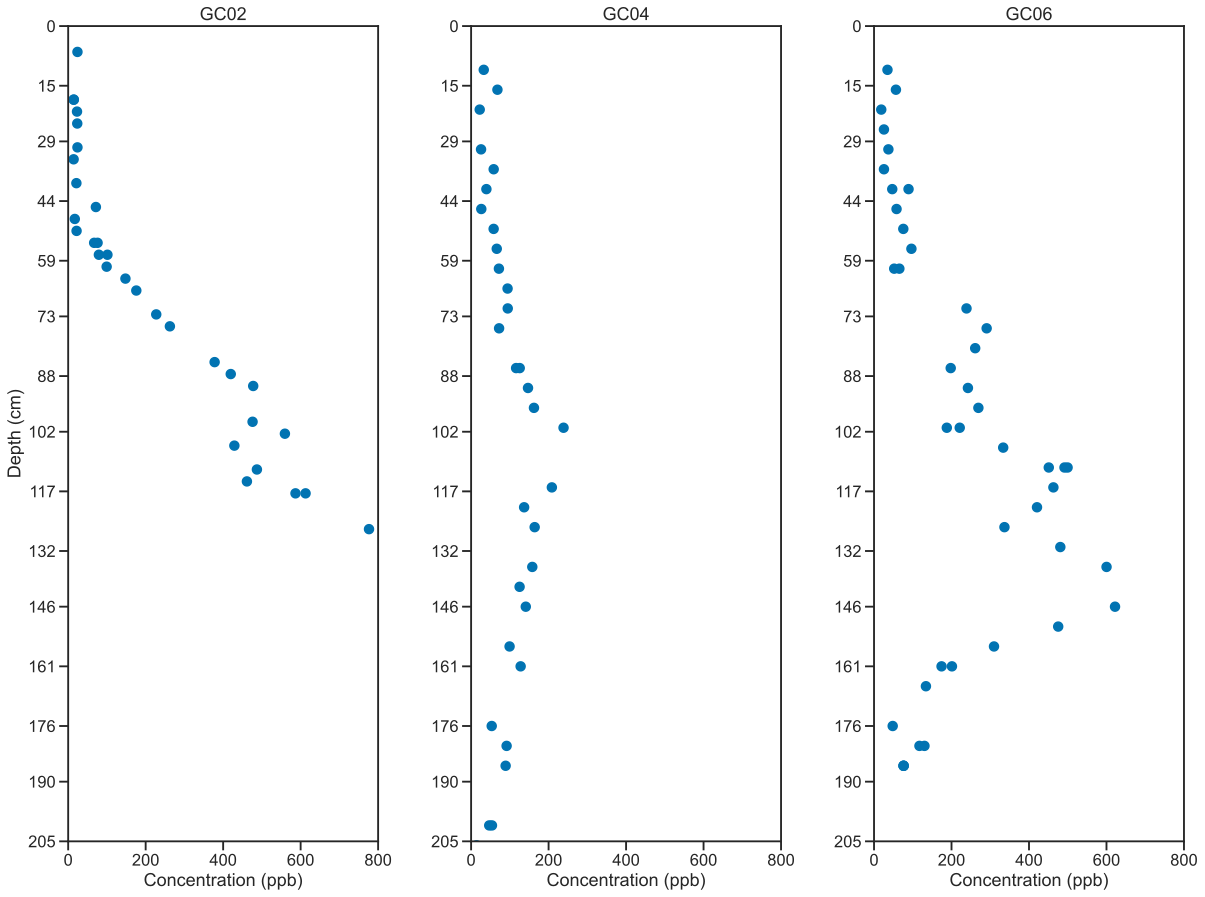

In [14]:
#Depth profiles of Fe56 for each separate core
#Group by core
df_group = df_fe56.groupby("Core")
# Initialize figure
fig, ax = plt.subplots(1, 3, figsize=(20, 15))

# Loop through cores
for i, (group, data) in enumerate(df_group):
    
    # Plot data
    ax[i].scatter(data.Sample_conc_ppb, data.Real_depth_cm, s=80)
    #ax[i].plot(data.Sample_conc_ppb, data.Depth_cm)
    
    #Create a Savitzky-Golay filter. It uses least squares to regress a small window of your data onto a polynomial, 
    #then uses the polynomial to estimate the point in the center of the window. Finally the window is shifted forward 
    #by one data point and the process repeats. This continues until every point has been optimally adjusted relative 
    #to its neighbors. It works great even with noisy samples from non-periodic and non-linear sources.
    #xhat_MC01 = savgol_filter(MC01_data["real_conc"], 9, 3) # window size 51, polynomial order 3
    #xhat = savgol_filter(data.Sample_conc_ppb, 21, 3, mode='nearest') # window size 51, polynomial order 3
    
    #Plot the Savitzky-Golay curve for each core on top of the scatter plots
    #ax[i].plot(xhat, data.Depth_cm)

    ax[i].set_title(group)
    ax[i].set_xlabel('Concentration (ppb)')
    ax[0].set_ylabel('Depth (cm)')
    ax[i].set_yticks(np.linspace(205, 0, 15).round(0))
    ax[i].set_xticks(np.linspace(0, 800, 5)) 
    #Make all plots start at depth 0 and end at depth 205
    ax[i].set_ylim(bottom=0)
    ax[i].set_ylim(top=205)
    ax[i].set_xlim(0, 800)
    #Invert y axis
    ax[i].invert_yaxis()
# Increase spacing among subplots
plt.subplots_adjust(wspace=0.3)
#Save figure
#fig.savefig('Fe56_depth_profiles.pdf', bbox_inches='tight')

In [15]:
#Depth profile of Mn55

# Filter by ion
df_mn55 = df_samples[(df_samples.Ion=='Mn55') & (df_samples.Core!='MC01')]
# Remove outliers
df_mn55 = df_mn55[(df_mn55.Core=='GC02') & (df_mn55.Depth_cm!=36) & (df_mn55.Depth_cm!=90) & (df_mn55.Depth_cm!=99) 
                  & (df_mn55.Depth_cm!=105) & (df_mn55.Depth_cm!=111)|
                  (df_mn55.Core=='GC04') |
                  (df_mn55.Core=='GC06') & (df_mn55.Depth_cm!=140) & (df_mn55.Depth_cm!=45)]
df_mn55['Sample_conc_uM'] = df_mn55['Sample_conc_ppb']/54.94
df_mn55 = df_mn55.sort_values('Real_depth_cm')

# Export data table
df_mn55.to_csv(f'{homedir}/data/processed/ICP-MS/SR2113_ICP_MS_gc_mn.csv')
df_mn55.head()

,Date,Type,runno,Sample_Name,Number,Det.,Ion,Measurement,Core,Depth_cm,Real_depth_cm,Real_conc_ppb,Dilfac,Standard_group,U_spike_mass,Sample_mass,Total_mass,Conc_spike,U238_to_U236_mean,U238_to_U236_stdev,U238_to_U236_sterr,U238_to_U236_stderr,U238_to_U236_stderr_over_mean,Sample_conc_ppb,Sample_conc_ppb_undil,Sample_conc_uM
591,5022022,Sample,32,GC42,36020.51600,NaN,Mn55,CPS,GC02,3.0,6.5,NaN,10.094171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.001794,9.906885,1.820200
2482,5202022,Sample,30,a,52495.67642,NaN,Mn55,CPS,GC04,5.0,11.0,NaN,16.020453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441.501525,27.558617,8.036067
2298,5142022,Sample,35,109,51495.24122,NaN,Mn55,CPS,GC06,5.0,11.0,NaN,10.130200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.764826,14.783995,2.725971
2975,6042022,Sample,46,103,92722.92791,NaN,Mn55,CPS,GC06,10.0,16.0,NaN,10.495840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.880811,25.713123,4.912283
2474,5202022,Sample,22,b,43557.92985,NaN,Mn55,CPS,GC04,10.0,16.0,NaN,10.671842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243.644021,22.830549,4.434729


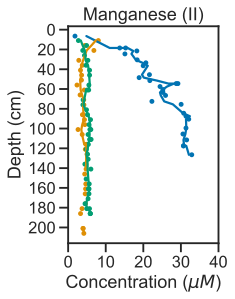

In [16]:
#Make plot of Mn55 for all cores
#Group by core
mn_group = df_mn55.groupby("Core")

fig, ax = plt.subplots(figsize=(2.7,4))
for name, group in mn_group:
    ax.scatter(group.Sample_conc_uM, group.Real_depth_cm, s=12, label=name)
    #ax.plot(group.Sample_conc_uM, group.Depth_cm)
    #Create a Savitzky-Golay filter
    xhat = savgol_filter(group.Sample_conc_uM, 9, 4, mode='nearest') # window size 51, polynomial order 3
    
    #Plot the Savitzky-Golay curve for each core on top of the scatter plots
    ax.plot(xhat, group.Real_depth_cm)
    
    # Set plot title
    ax.set_title('Manganese (II)')#, fontsize =16)

    #Invert y axis
    ax.invert_yaxis()
    ax.set_xlabel('Concentration ($\mu M$)')
    ax.set_ylabel('Depth (cm)')
    ax.set_yticks(np.arange(0, 220, 20.0))
    ax.set_xticks(np.linspace(0, 40, 5).round(1)) 
    #ax.set_xticks(np.linspace((ax.get_xbound()[0]), (ax.get_xbound()[1]), 5).round(1))
#ax.legend(bbox_to_anchor=(0.5, -0.25), ncol=4, loc = 'lower center')

#Save figure
fig.savefig(f'{homedir}/figures/manganese_profile_poster.pdf', bbox_inches='tight')

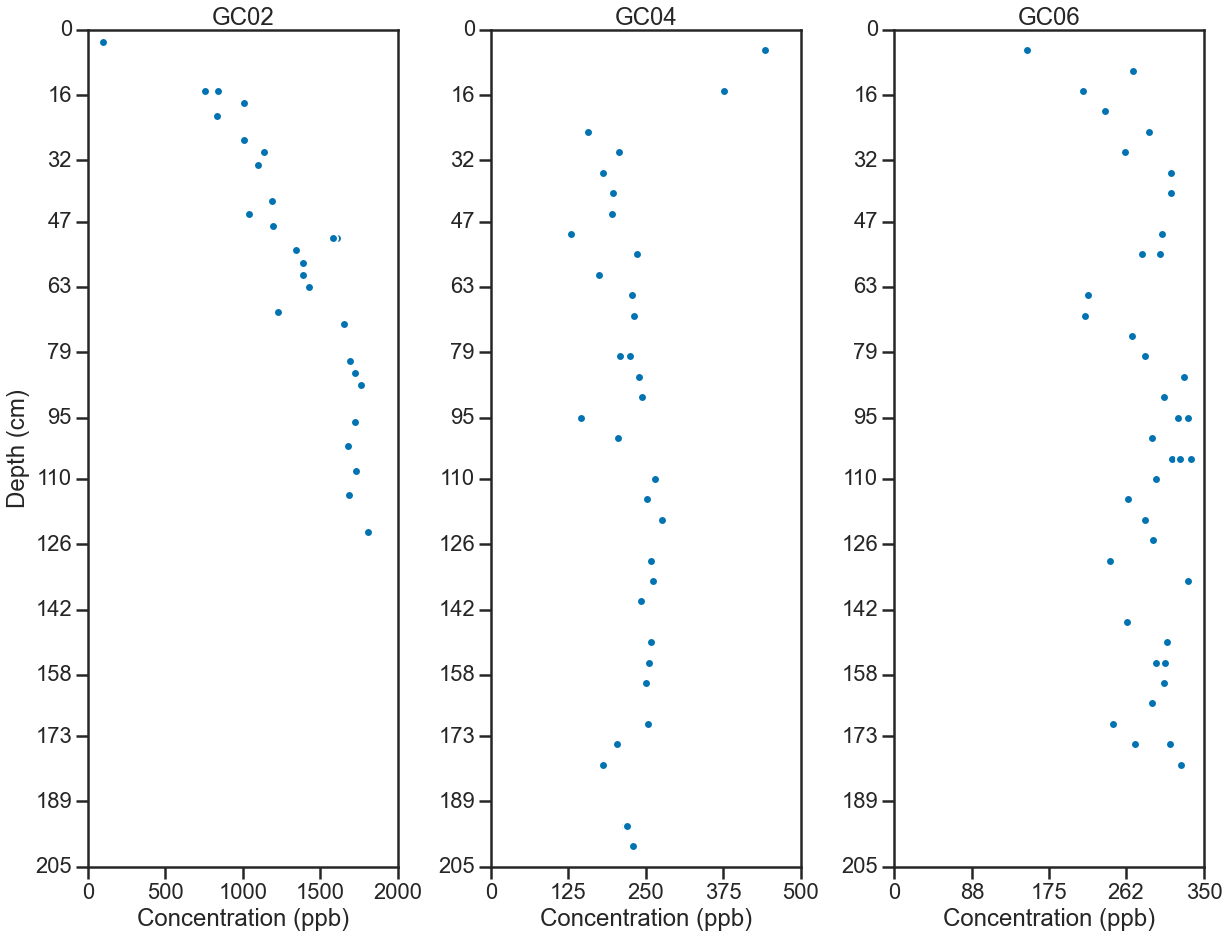

In [764]:
#Depth profile of Mn55

# Initialize figure
fig, ax = plt.subplots(1, 3, figsize=(20, 15))

# Loop through cores
for i, (group, data) in enumerate(df_group):
    # Plot data
    ax[i].scatter(data.Sample_conc_ppb, data.Depth_cm, s=80)
    ax[i].set_title(group)
    ax[i].set_xlabel('Concentration (ppb)')
    ax[0].set_ylabel('Depth (cm)')
   
    ax[i].set_yticks(np.linspace(205, 0, 14).round(0))
    #ax[i].set_xticks(np.linspace(0, 2000,5).round(0))
    ax[i].set_xticks(np.linspace(0, ax[i].get_xbound()[1],5).round(0))
    #Make all plots start at depth 0 and end at depth 205
    ax[i].set_ylim(bottom=0)
    ax[i].set_ylim(top=205)
    ax[i].set_xlim(0)
    #Invert y axis
    ax[i].invert_yaxis()
# Increase spacing among subplots
plt.subplots_adjust(wspace=0.3)

In [11]:
#Depth profile of multicore

# Filter by multicore
df_mc = df_samples[(df_samples.Core=='MC01')]
# Filter by ions
df_mc_ions = df_mc[(df_mc.Ion=='Mn55') | (df_mc.Ion=='Fe56')]# | (df_mc.Ion=='U238')]
# Remove outliers
df_mc_ions = df_mc_ions[(df_mc_ions.Ion=='Fe56') & (df_mc_ions.Depth_cm!=15) & (df_mc_ions.Depth_cm!=23)|
                  (df_mc_ions.Ion=='Mn55') & (df_mc_ions.Depth_cm!=5) 
                    & (df_mc_ions.Depth_cm!=6) & (df_mc_ions.Depth_cm!=10)]#|
                  #(df_mc_ions.Ion=='U238') & (df_mc_ions.Depth_cm!=5) & (df_mc_ions.Depth_cm!=10)]

Sample_conc_uM = []

for index, row in df_mc_ions.iterrows():
    if row.Ion=='Mn55':
        Sample_conc_uM.append (row.Sample_conc_ppb/54.94)
    else:
        Sample_conc_uM.append (row.Sample_conc_ppb/55.84)

df_mc_ions['Sample_conc_uM'] = Sample_conc_uM
df_mc_ions = df_mc_ions.sort_values('Depth_cm')
df_mc_ions

,Date,Type,runno,Sample_Name,Number,Det.,Ion,Measurement,Core,Depth_cm,Real_depth_cm,Real_conc_ppb,Dilfac,Standard_group,U_spike_mass,Sample_mass,Total_mass,Conc_spike,U238_to_U236_mean,U238_to_U236_stdev,U238_to_U236_sterr,U238_to_U236_stderr,U238_to_U236_stderr_over_mean,Sample_conc_ppb,Sample_conc_ppb_undil,Sample_conc_uM
2340,5142022,Sample,77,2,8.755469e+05,NaN,Mn55,CPS,MC01,2.0,2.0,NaN,9.652267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2473.211236,256.231125,45.016586
2153,5142022,Sample,77,2,8.928296e+03,NaN,Fe56,CPS,MC01,2.0,2.0,NaN,9.652267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.461001,2.016210,0.348514
603,5022022,Sample,44,GC03,1.984138e+06,NaN,Mn55,CPS,MC01,3.0,3.0,NaN,10.119770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4851.449897,479.403180,88.304512
709,5022022,Sample,44,GC03,8.662592e+03,NaN,Fe56,CPS,MC01,3.0,3.0,NaN,10.119770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.313696,2.995493,0.542867
2150,5142022,Sample,74,4,6.499960e+03,NaN,Fe56,CPS,MC01,4.0,4.0,NaN,13.930698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.862789,1.569397,0.391526
2337,5142022,Sample,74,4,1.314275e+06,NaN,Mn55,CPS,MC01,4.0,4.0,NaN,13.930698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5360.230970,384.778358,97.565180
2657,5202022,Sample,46,5,1.025582e+04,NaN,Fe56,CPS,MC01,5.0,5.0,NaN,10.565762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.078815,3.130755,0.592386
694,5022022,Sample,28,GC06,1.207328e+04,NaN,Fe56,CPS,MC01,6.0,6.0,NaN,10.036782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.302656,3.517328,0.632211
2487,5202022,Sample,36,8,1.022373e+06,NaN,Mn55,CPS,MC01,8.0,8.0,NaN,10.543756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5700.204135,540.623697,103.753261
2647,5202022,Sample,36,8,7.716438e+04,NaN,Fe56,CPS,MC01,8.0,8.0,NaN,10.543756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267.225116,25.344396,4.785550


In [12]:
# Export data table

df_mc_ions.to_csv(f'{homedir}/data/processed/ICP-MS/SR2113_ICP_MS_processed.csv')

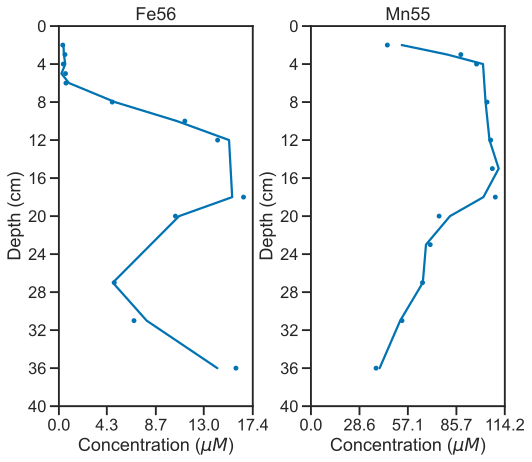

In [21]:
#Group by core
df_group = df_mc_ions.groupby("Ion")
# Initialize figure
fig, ax = plt.subplots(1, 2, figsize=(8, 7))

# Loop through cores
for i, (group, data) in enumerate(df_group):
    # Plot data
    ax[i].scatter(data.Sample_conc_uM, data.Depth_cm, s=12)
    #Create a Savitzky-Golay filter
    xhat = savgol_filter(data.Sample_conc_uM, 7, 5, mode='nearest') # window size 51, polynomial order 3
    
    #Plot the Savitzky-Golay curve for each core on top of the scatter plots
    ax[i].plot(xhat, data.Depth_cm)
    ax[i].set_title(group)
    ax[i].set_xlabel('Concentration ($\mu M$)')
    ax[i].set_ylabel('Depth (cm)')
   
    ax[i].set_yticks(np.linspace(40, 0, 11).round(0))
    ax[i].set_xticks(np.linspace(0, ax[i].get_xbound()[1],5).round(1))
    #Make all plots start at depth 0 and end at 37
    ax[i].set_ylim(bottom=0)
    ax[i].set_ylim(top=40)
    ax[i].set_xlim(0)
    #Invert y axis
    ax[i].invert_yaxis()
# Increase spacing among subplots
plt.subplots_adjust(wspace=0.3)

#Save figure
fig.savefig(f'{homedir}/figures/mc_fe_mn_profile.pdf', bbox_inches='tight')

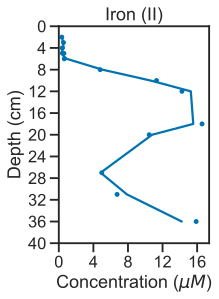

In [22]:
# Plot iron only
#Filter the multicore data for iron
df_mc_fe = df_mc_ions[(df_mc_ions.Ion=='Fe56')]
#Initialize figure
fig, ax = plt.subplots(figsize=(2.7,4))
# Plot data
ax.scatter(df_mc_fe.Sample_conc_uM, df_mc_fe.Depth_cm, s=12)
#Create a Savitzky-Golay filter
xhat = savgol_filter(df_mc_fe.Sample_conc_uM, 7, 5, mode='nearest') # window size 51, polynomial order 3
    
#Plot the Savitzky-Golay curve for each core on top of the scatter plots
ax.plot(xhat, df_mc_fe.Depth_cm)
ax.set_title('Iron (II)')
ax.set_xlabel('Concentration ($\mu M$)')
ax.set_ylabel('Depth (cm)')
   
ax.set_yticks(np.linspace(40, 0, 11).round(0))
ax.set_xticks(np.linspace(0, 16,5).round(0))
#Make plot start at depth 0 and end at 37
ax.set_ylim(bottom=0)
ax.set_ylim(top=40)
ax.set_xlim(0)
#Invert y axis
ax.invert_yaxis()

#Save figure
fig.savefig(f'{homedir}/figures/mc_iron_profile_poster.pdf', bbox_inches='tight')

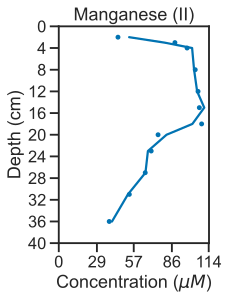

In [23]:
# Plot manganese only
#Filter the multicore data for iron
df_mc_mn = df_mc_ions[(df_mc_ions.Ion=='Mn55')]
#Initialize figure
fig, ax = plt.subplots(figsize=(2.7,4))
# Plot data
ax.scatter(df_mc_mn.Sample_conc_uM, df_mc_mn.Depth_cm, s=12)
#Create a Savitzky-Golay filter
xhat = savgol_filter(df_mc_mn.Sample_conc_uM, 7, 5, mode='nearest') # window size 51, polynomial order 3
    
#Plot the Savitzky-Golay curve for each core on top of the scatter plots
ax.plot(xhat, df_mc_mn.Depth_cm)
ax.set_title('Manganese (II)')
ax.set_xlabel('Concentration ($\mu M$)')
ax.set_ylabel('Depth (cm)')
   
ax.set_yticks(np.linspace(40, 0, 11).round(0))
ax.set_xticks(np.linspace(0, ax.get_xbound()[1],5).round(0))
#Make plot start at depth 0 and end at 37
ax.set_ylim(bottom=0)
ax.set_ylim(top=40)
ax.set_xlim(0)
#Invert y axis
ax.invert_yaxis()

#Save figure
fig.savefig(f'{homedir}/figures/mc_manganese_profile_poster.pdf', bbox_inches='tight')

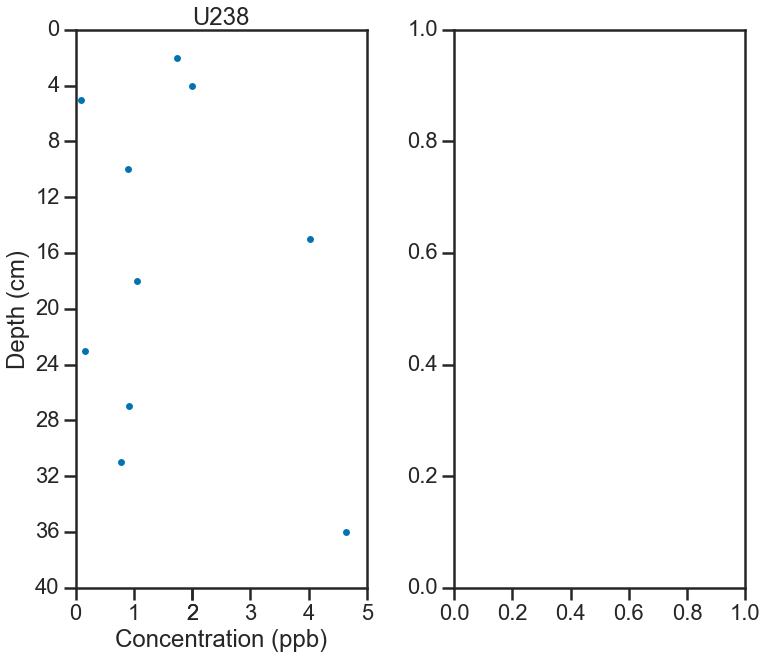

In [722]:
#Depth profile of multicore

# Filter by multicore
df_u238_mc = df_u238[(df_u238.Core=='MC01')]
# Remove outliers
df_u238_mc = df_u238_mc[(df_u238_mc.Depth_cm!=3) & (df_u238_mc.Depth_cm!=6)]
#Group by core
df_group = df_u238_mc.groupby("Ion")
# Initialize figure
fig, ax = plt.subplots(1, 2, figsize=(12, 10))

# Loop through cores
for i, (group, data) in enumerate(df_group):
    # Plot data
    ax[i].scatter(data.Sample_conc_ppb_corr, data.Depth_cm, s=80)
    ax[i].set_title(group)
    ax[i].set_xlabel('Concentration (ppb)')
    ax[0].set_ylabel('Depth (cm)')
   
    ax[i].set_yticks(np.linspace(40, 0, 11).round(0))
    ax[i].set_xticks(np.linspace(0, ax[i].get_xbound()[1],7).round(0))
    #Make all plots start at depth 0 and end at 37
    ax[i].set_ylim(bottom=0)
    ax[i].set_ylim(top=40)
    ax[i].set_xlim(0)
    #Invert y axis
    ax[i].invert_yaxis()
# Increase spacing among subplots
plt.subplots_adjust(wspace=0.3)

## Determining standard precision

In [85]:
#For 05022022 based on the standard curve

# Determine mean CPS for each ion and standard
#Filter by date
df_standards_05022022 = df_standards[(df_standards.Date == 5022022)]

#Group standards by CPS
#Filter by cps only
df_standards_cps = df_standards_05022022[(df_standards_05022022.Measurement == 'CPS')]
#Filter by rsd only
df_standards_rsd = df_standards_05022022[(df_standards_05022022.Measurement == 'RDS')]

#Group by ion
grouped_standards_cps = df_standards_cps.groupby(['Ion', 'Real_conc_ppb'])
grouped_standards_rsd = df_standards_rsd.groupby(['Ion'])

# Determine the mean of each standard  and rename the series
mean_stds = grouped_standards_cps['Number'].mean()
mean_stds = mean_stds.rename("CPS_mean")

# Determine the standard deviation of each standard  and rename the series
std_dev_stds = grouped_standards_cps['Number'].std()
std_dev_stds = std_dev_stds.rename("CPS_stdev")

# Determine the % RSD of each standard  and rename the series
prsd_stds = grouped_standards_cps['Number'].std()*100/grouped_standards_cps['Number'].mean()
prsd_stds = prsd_stds.rename("CPS % RSD")

#Pass series to individual dataframes
df_mean_stds=mean_stds.to_frame()
df_std_dev_stds=std_dev_stds.to_frame()
df_prsd_stds=prsd_stds.to_frame()

#merge the mean and standard deviation dataframes
df_anrep = pd.merge(df_mean_stds, df_prsd_stds, how='outer', on=['Ion', 'Real_conc_ppb'])

#Reset index of the dataframe
df_anrep = df_anrep.reset_index()

#Determine the accuracy by subtracting the true value from the average value of each standard
df_anrep

,Ion,Real_conc_ppb,CPS_mean,CPS % RSD
0,Ba137,0.40,669.2855,4.133970
1,Ba137,0.77,991.6705,5.862653
2,Ba137,3.77,7889.1440,3.257386
3,Ba137,7.80,15082.8555,2.077738
4,Ba137,38.18,70222.3280,2.163502
...,...,...,...,...
97,Zn66,0.77,1195.0280,15.275889
98,Zn66,3.77,6024.0395,3.609036
99,Zn66,7.80,10597.9620,2.936363
100,Zn66,38.18,49537.1275,0.974857


In [86]:
#Filter by ion
df_anrep[(df_anrep.Ion=='U238')]

,Ion,Real_conc_ppb,CPS_mean,CPS % RSD
84,U238,0.40,5.117694e+03,3.935529
85,U238,0.77,9.878978e+03,5.476444
86,U238,3.77,1.278340e+05,4.493875
87,U238,7.80,2.530770e+05,4.186822
88,U238,38.18,1.214261e+06,4.064651
89,U238,366.63,1.300616e+07,3.276889


In [96]:
#For 05142022 based on the calibration standards
#Filter by date
df_qcs_05142022 = df_cps[(df_cps.Date == 5142022) & (df_cps.Type == 'qc')]
#Group by ion
grouped_standards_cps = df_qcs_05142022.groupby(['Ion'])
grouped_standards_rsd = df_qcs_05142022.groupby(['Ion'])

# Determine the mean of each standard  and rename the series
mean_stds = grouped_standards_cps['Number'].mean()
mean_stds = mean_stds.rename("CPS_mean")

# Determine the standard deviation of each standard  and rename the series
std_dev_stds = grouped_standards_cps['Number'].std()
std_dev_stds = std_dev_stds.rename("CPS_stdev")

# Determine the % RSD of each standard  and rename the series
prsd_stds = grouped_standards_cps['Number'].std()*100/grouped_standards_cps['Number'].mean()
prsd_stds = prsd_stds.rename("CPS % RSD")

#Pass series to individual dataframes
df_mean_stds=mean_stds.to_frame()
df_std_dev_stds=std_dev_stds.to_frame()
df_prsd_stds=prsd_stds.to_frame()

#merge the mean and standard deviation dataframes
df_anrep = pd.merge(df_mean_stds, df_prsd_stds, how='outer', on=['Ion'])

#Reset index of the dataframe
df_anrep = df_anrep.reset_index()

#Determine the accuracy by subtracting the true value from the average value of each standard
df_anrep

,Ion,CPS_mean,CPS % RSD
0,Fe56,5.395747e+05,0.731323
1,Mn55,3.467305e+05,0.698092
2,U238,3.096954e+06,0.670940
